# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [215]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# keep a copy of original images
X_train_orig = X_train
y_train_orig = y_train
X_valid_orig = X_valid
X_test_orig = X_test

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [230]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
import numpy as np

n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


#### Data Set Summary & Exploration

##### _The basic summary of the data set using the python numpy_

- The size of training set is 34799
- The size of the validation set is 4410
- The size of test set is 12630
- The shape of a traffic sign image is (32, 32, 3)
- The number of unique classes/labels in the data set is 43

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

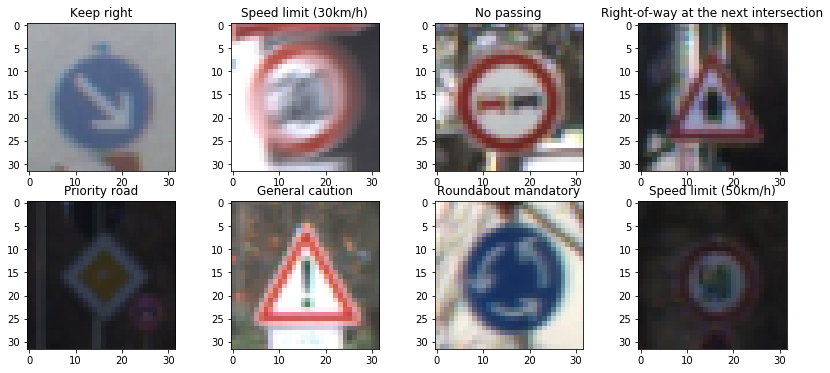

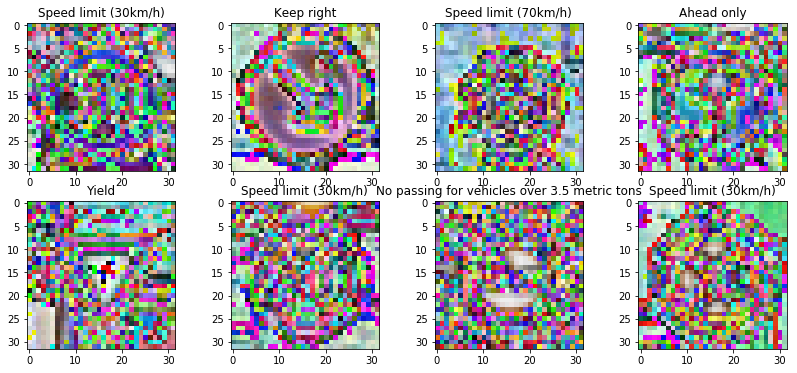

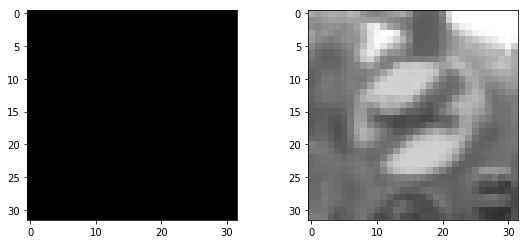

In [231]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import csv
traffic_sign_names = []

with open('signnames.csv') as csvfile:
    signnames = csv.reader(csvfile,delimiter=',')
    for row in signnames:
        traffic_sign_names.append(row[1])
traffic_sign_names.pop(0)

import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
def show_random_images(X_train):
    fig, axs = plt.subplots(2, 4, figsize=(14, 6))
    fig.subplots_adjust(hspace=.2, wspace=.2)
    axs = axs.ravel()
    for i in range(8):
        index = random.randint(0, len(X_train))
        image = X_train[index]
        axs[i].imshow(image)
        axs[i].set_title(traffic_sign_names[y_train[index]])

def show_sharpened_images(X_train):
    fig, axs = plt.subplots(2, 4, figsize=(14, 6))
    fig.subplots_adjust(hspace=.2, wspace=.2)
    axs = axs.ravel()
    for i in range(8):
        index = random.randint(0, len(X_train))
        image = X_train[index]
        blurred_image = ndimage.gaussian_filter(image, .1)
        filter_blurred_image = ndimage.gaussian_filter(blurred_image, 1)
        alpha = 30/3.
        sharpened_image = blurred_image + alpha * (blurred_image - filter_blurred_image)
        axs[i].imshow(sharpened_image)
        axs[i].set_title(traffic_sign_names[y_train[index]])

from skimage import data, segmentation
from skimage import filters
from scipy import ndimage
from PIL import Image, ImageEnhance
import cv2

def plot_boundary():
    coins = cv2.cvtColor(X_train[100], cv2.COLOR_RGB2GRAY )
    mask = coins > filters.threshold_otsu(coins)
    clean_border = segmentation.clear_border(mask).astype(np.int)
    coins_edges = segmentation.mark_boundaries(coins, clean_border)
    plt.figure(figsize=(8, 3.5))
    plt.subplot(121)
    plt.imshow(clean_border, cmap='gray')
    plt.subplot(122)
    plt.imshow(coins_edges)
    plt.tight_layout()
    plt.show()
        
show_random_images(X_train)
show_sharpened_images(X_train)
plot_boundary()



##### _Picked some random signs and visualized here above_

Below shows the histgram of the training data distribution

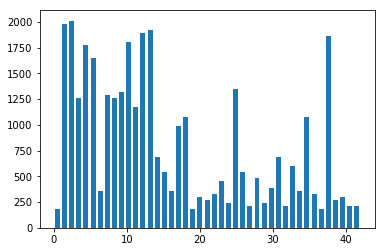

In [232]:
# histogram of label frequency
def hist_labels(y_train):
    hist, bins = np.histogram(y_train, bins=n_classes)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()
    
hist_labels(y_train)

From this histgram, it shows that there are a lot more images than others in this data set. Ths least number of signs is less than 200.

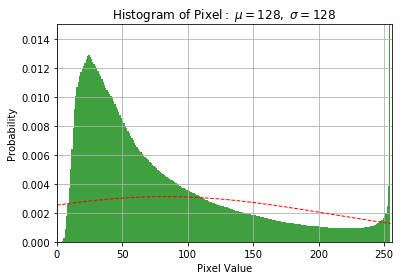

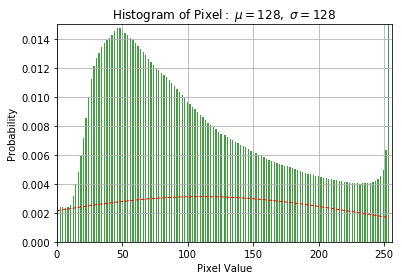

In [233]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the training data
x_flat = X_train.flatten()
n, bins, patches = plt.hist(x_flat, 256, normed=1, facecolor='green', alpha=0.75)
mu = np.mean(x_flat)
sigma = 128

y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Pixel:}\ \mu=128,\ \sigma=128$' )
plt.axis([0, 256, 0, 0.015])
plt.grid(True)
plt.show()

# the histogram of the training data
x_flat = 2*X_train.flatten()
n, bins, patches = plt.hist(x_flat, 256, normed=1, facecolor='green', alpha=0.75)
mu = np.mean(x_flat)
sigma = 128

y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Pixel:}\ \mu=128,\ \sigma=128$' )
plt.axis([0, 256, 0, 0.015])
plt.grid(True)

plt.show()

From the histogram, it is noticed that the over all images are pretty dark. I am wondering if we can bright up the images so that the network will be easier to train?


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

https://keras.io/preprocessing/image/

before merging  (34799, 32, 32, 3)
before merging  (34799,)
before generation  (39209, 32, 32, 3)
before generation  (39209,)
0 ... 1 ... 2 ... 3 ... 4 ... 5 ... 6 ... 7 ... 8 ... 9 ... 10 ... 11 ... 12 ... 13 ... 14 ... 15 ... 16 ... 17 ... 18 ... 19 ... 20 ... 21 ... 22 ... 23 ... 24 ... 25 ... 26 ... 27 ... 28 ... 29 ... 30 ... 31 ... 32 ... 33 ... 34 ... 35 ... 36 ... 37 ... 38 ... 39 ... 40 ... 41 ... 42 ... after generation  (56119, 32, 32, 3)
after generation  (56119,)


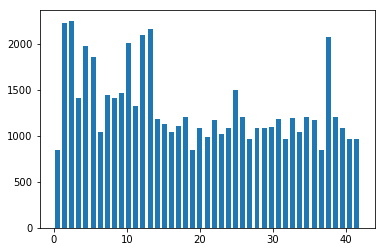

In [234]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# creat the generator to perform online data augmentation
from keras.preprocessing.image import ImageDataGenerator
import cv2

image_datagen = ImageDataGenerator(rotation_range=5.,
                                   shear_range=0.2,
                                   rescale = 0.9,
                                   channel_shift_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

def images_generator(images, lables, num_of_classes, min_samples=500):
    for class_n in range(0, num_of_classes):
        print(class_n, '... ', end='')
        imagemarkimg = images[lables == class_n]
        labelmarkimg = lables[lables == class_n] 
        n_samples = len(imagemarkimg)                
        batch_counter = (min_samples-n_samples)
        batch_size= 100        
        
        if n_samples < min_samples:
            for x_batch, y_batch in image_datagen.flow(imagemarkimg, labelmarkimg, batch_size):
                images = np.concatenate((images, x_batch), axis=0)
                lables = np.concatenate((lables, y_batch), axis=0)                
                if batch_counter < 0:
                    break                    
                batch_counter -= batch_size        
    return images, lables

# generate more images to be added to the training set
# up to here, X_train and y_train are original set
print('before merging ', X_train.shape)
print('before merging ',y_train.shape)
# merge the training and validation data to be augumented

X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

print('before generation ', X_train.shape)
print('before generation ',y_train.shape)

X_train_argumented,y_train_argumented = images_generator(X_train,y_train,n_classes, 1000)

print('after generation ', X_train_argumented.shape)
print('after generation ',y_train_argumented.shape)
hist_labels(y_train_argumented)


##### 1 Preprocess of the image data
- Since it was noticed that some of the signs have a very small dataset, while some of the signs have more than 2000 images. To enforce the training on thoes signs with fewer images, I use https://keras.io/preprocessing/image/ to generate more purtubated images to add to the dataset.
- Also from the histgram of the images, it was found that all the images are skewed towards the darker side. So I decided to try brighten the images (with a shift parameter, set to 1.5)
- Also normalized data so the values of the images arrays is between -1 and 1
- Initially I thought to train the network to learn the sign, it would be helpful to have colors in the images. That would provide more distinctive information for the network, as intuitively, humans rely on the color more than the shape for the traffic signals. However, with the color images, I have a hard time to achive the 0.9 accuracy for the training. I tried out using the gray scale images and it's easily achive the 0.993 accuracy. I would like to learn more why the color didn't provide more information for the network to learn.

In [235]:
def normalize(data, shift=1.5): 
    mean = np.mean(data*shift)
    return (data*shift - mean)/mean

print('\nBefore normaliz, the average: ', np.mean(X_train_argumented))
X_train_normalized = normalize(X_train_argumented, 1.5)
# will split out X_valid later
# X_valid_normalized = normalize(X_valid_orig, 1.5)
X_test_normalized = normalize(X_test_orig, 1.5)

print('\nAfter normaliz, the average: ', np.mean(X_train_normalized))



Before normaliz, the average:  80.9419938304

After normaliz, the average:  -6.16519097416e-16


In [236]:
def gray(images):
    return np.sum(images/3, axis=3, keepdims=True)
#     return images
    
print(X_train_normalized.shape)
X_train_gry = gray(X_train_normalized) 
# X_valid_gry = gray(X_valid_normalized)
X_test_gry = gray(X_test_normalized)

print(X_train_gry.shape)

(56119, 32, 32, 3)
(56119, 32, 32, 1)


### Model Architecture

In [237]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# slpit the traning and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_gry, y_train_argumented, 
                                                                test_size=0.20, random_state=42)

# Shuffle the training data.
X_test = X_test_gry
# X_valid = X_valid_gry
X_train, y_train = shuffle(X_train_gry, y_train_argumented)
print(X_train.shape)
print(y_train.shape)


(56119, 32, 32, 1)
(56119,)


### --- Tuning Parameters ---
put the hyperparameters in one place for easy of tuning

In [238]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
LEARNING_RATE = 0.001

#### 2 My final model architectue:

My final model consisted of the following layers:

| Layer         		|     Description	        					|
|:---------------------:|:---------------------------------------------:|
| Input         		| 32x32x1 grayscal image   						|
| Convolution 5x5     	| 1x1 stride, same padding, outputs 28x28x8 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x8 				    |
| Convolution 5x5	    | 1x1 stride,  outputs 10x10x16      			|
| Max pooling           | 2x2 stride,  outputs 5x5x16                   |
| Flatten               |              outputs 400                      |
| Fully connected       |              outputs 400                      |
| RELU                  |              outputs 200                      |
| Fully connected		|              outputs 84                       |        							
| Fully connected		|         	   outputs 43						|



In [239]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    input_layer = 1
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    print(input)
    #  Weight and bias
    weight_1 = tf.Variable(tf.truncated_normal([5, 5, input_layer, 8]))
    bias_1 = tf.Variable(tf.zeros(8))
    # Apply Convolution
    strides_1_1 = [1, 1, 1, 1]
    conv_1 = tf.nn.conv2d(x, weight_1, strides_1_1, padding='VALID')
    # Add bias
    conv_1 = tf.nn.bias_add(conv_1, bias_1)
    # TODO: Activation. using relu
    conv_1 = tf.nn.relu(conv_1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1, 2, 2, 1]
    strides_1_2 = [1, 2, 2, 1]
    pooling_1 = tf.nn.max_pool(conv_1, ksize, strides_1_2, padding='VALID')   
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weight_2 = tf.Variable(tf.truncated_normal([5, 5, 8, 16]))
    bias_2 = tf.Variable(tf.zeros(16)) 
    strides_2_1 = [1, 1, 1, 1]
    conv_2 = tf.nn.conv2d(pooling_1, weight_2, strides_2_1, padding='VALID')
    # Add bias
    conv_2 = tf.nn.bias_add(conv_2, bias_2)
    # TODO: Activation.
    conv_2 = tf.nn.relu(conv_2)  
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    ksize = [1, 2, 2, 1]
    strides_2_2 = [1, 2, 2, 1]
    pooling_2 = tf.nn.max_pool(conv_2, ksize, strides_2_2, padding='VALID')  
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flated = tf.contrib.layers.flatten(pooling_2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    # try 200
    weight_3 = tf.Variable(tf.truncated_normal(shape=(400,200), mean=mu, stddev=sigma))
    bias_3 = tf.Variable(tf.zeros(200))     
    layer_3 = tf.add(tf.matmul(flated, weight_3), bias_3)
    # TODO: Activation.
    layer_3 = tf.nn.relu(layer_3)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weight_4 = tf.Variable(tf.truncated_normal(shape=(200, 84), mean=mu, stddev=sigma))
    bias_4 = tf.Variable(tf.zeros(84))   
    layer_4 = tf.add(tf.matmul(layer_3, weight_4), bias_4)
    # TODO: Activation.
    layer_4 = tf.nn.relu(layer_4)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    weight_5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    bias_5 = tf.Variable(tf.zeros(43))   
    logits = tf.add(tf.matmul(layer_4, weight_5), bias_5)    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [240]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


### Features and Labels

In [241]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline

Create a training pipeline that uses the model to classify the traffic sign

In [242]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x7f5fccf59320>>


### Model Evaluation

Evaluate how well the loss and accuracy of the model for the dataset input (X_data, y_data)

In [243]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model

Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.

In [244]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")
    print('EPOCHS = ', EPOCHS, ' BATCH = ', BATCH_SIZE, ' LEARNING_RATE = ', LEARNING_RATE)


(56119, 32, 32, 1)
(56119,)

Training...

EPOCH 1 ...
Validation Accuracy = 0.601

EPOCH 2 ...
Validation Accuracy = 0.793

EPOCH 3 ...
Validation Accuracy = 0.856

EPOCH 4 ...
Validation Accuracy = 0.906

EPOCH 5 ...
Validation Accuracy = 0.919

EPOCH 6 ...
Validation Accuracy = 0.947

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.978

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.972

EPOCH 13 ...
Validation Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.987

EPOCH 15 ...
Validation Accuracy = 0.984

EPOCH 16 ...
Validation Accuracy = 0.993

EPOCH 17 ...
Validation Accuracy = 0.987

EPOCH 18 ...
Validation Accuracy = 0.992

EPOCH 19 ...
Validation Accuracy = 0.991

EPOCH 20 ...
Validation Accuracy = 0.990

EPOCH 21 ...
Validation Accuracy = 0.984

EPOCH 22 ...
Validation Accuracy = 0.978

EPOCH 23 ...
Validation Accuracy = 0.996

E

EPOCHS = 50
BATCH_SIZE = 100
LEARNING_RATE = 0.0015
shift=1.5
EPOCH 50 ...
Validation Accuracy = 0.901

EPOCHS = 50
BATCH_SIZE = 100
LEARNING_RATE = 0.002
shift=1.5 
EPOCH 50 ...
Validation Accuracy = 0.916

EPOCHS = 50
BATCH_SIZE = 100
LEARNING_RATE = 0.002
shift=1.5 
with 8 output for the first layer of the network
EPOCH 50 ...
Validation Accuracy = 0.931

Validation Accuracy = 0.941
Model saved
EPOCHS =  50  BATCH =  128  LEARNING_RATE =  0.001

Validation Accuracy = 0.944
Model saved
EPOCHS =  32  BATCH =  64  LEARNING_RATE =  0.001

Validation Accuracy = 0.942
Model saved
EPOCHS =  32  BATCH =  256  LEARNING_RATE =  0.001

Validation Accuracy = 0.940
Model saved
EPOCHS =  32  BATCH =  128  LEARNING_RATE =  0.005

Validation Accuracy = 0.944
Model saved
EPOCHS =  32  BATCH =  128  LEARNING_RATE =  0.002

Validation Accuracy = 0.953
Model saved
EPOCHS =  32  BATCH =  128  LEARNING_RATE =  0.002

Validation Accuracy = 0.947
Model saved
EPOCHS =  32  BATCH =  128  LEARNING_RATE =  0.002

Validation Accuracy = 0.993
Model saved
EPOCHS =  50  BATCH =  128  LEARNING_RATE =  0.001
m_sample = 1000


#### 3 How I train the model:

- To train the model, I used an AdamOptimizer. 
- The final parameters used for the model is
* epocks : 50
* batch  : 128
* learning rate : 0.001

#### 4 The approach to find a optimal solution


##### My final model results were:

* training set accuracy of 0.993
* Validation accurancy of 0.993
* Test accuracy of 0.872

##### Iteration 

* I used the LeNet network architecture to start with assuming it will be a good network for this complex traffic sign classifier task. Put everything together and started training trials. 
* However, with the initial archotecture the best I can get was around lower 80%.
* Tried to tune the hyperparameters like EPOCHS, BATCH, and LEARNING_RATE, and also many different nodes in each layer. However, with some many parameters to adjust, it is not a very efficient approah.
* Started to analysis the training data set, their distribution and the qaulity of the images, which lead to generate more data points for the original data sets that has fewer images. And brightened the images, and normalized the images, and convert to grayscale.
* When I can't achive a higher accuracy, it could be the model is under fitting, so I increased the output layers of the convoltion.
* The EPOCHS, BATCH, LEARNING_RATE were tunned. The learning rate can affect the training quite a bit. If it's too high a learning rate, the initial staging of the training is faster, however, the later staging of the training will cause the accuracy to jump up and down (not stable).




In [245]:
print(X_test.shape)
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

(12630, 32, 32, 1)
Test Accuracy = 0.872


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(6, 32, 32, 1)


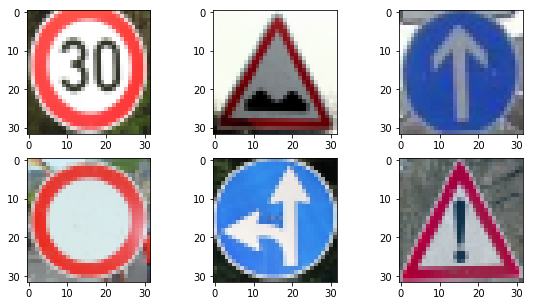

In [246]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np

fig, axs = plt.subplots(2,3, figsize=(10, 5))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
    
my_images = []

for i in range(0, 6):
    image = mpimg.imread('newSignImages/'+str(i+1)+'.png')
    axs[i].axis('on')  
    axs[i].imshow(image)
    my_images.append(image)
my_images = np.asarray(my_images)
my_images_norm = gray(normalize(my_images))
print(my_images_norm.shape)


### Predict the Sign Type for Each Image

In [247]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
my_labels = [1, 22, 35, 15, 37, 18]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_norm, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.833


### Analyze Performance

my_top_k_classes 
 [[ 0  1  2]
 [22 29 26]
 [35 37 33]
 [15 12  9]
 [37 23 33]
 [18 26 27]]
my_top_k_probability {:.0f}%
 [[  1.00000000e+02   4.61012684e-13   6.20856001e-18]
 [  1.00000000e+02   4.43470816e-17   1.15689803e-17]
 [  1.00000000e+02   1.15820274e-06   1.99828261e-08]
 [  9.99962082e+01   3.78534966e-03   3.17867034e-07]
 [  1.00000000e+02   3.38696786e-08   1.08798337e-09]
 [  1.00000000e+02   7.06888613e-07   7.79294435e-13]]


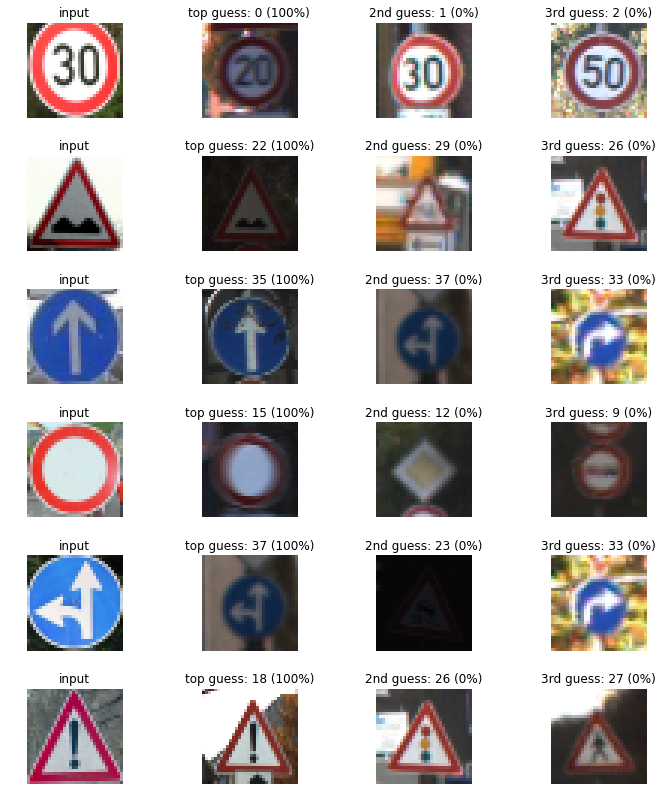

In [252]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_norm})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_norm})
    my_top_k_classes = my_top_k[1]
    my_top_k_probability =my_top_k[0]*100
    print('my_top_k_classes \n', my_top_k_classes)
    print('my_top_k_probability {:.0f}%\n', my_top_k_probability)    

def visulize():
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    for i, image in enumerate(my_images): 
        axs[4*i].axis('off')
        axs[4*i].imshow(image)
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_test == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_test_orig[index1].squeeze())
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_test == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_test_orig[index2].squeeze())
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_test == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_test_orig[index3].squeeze())
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
visulize()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

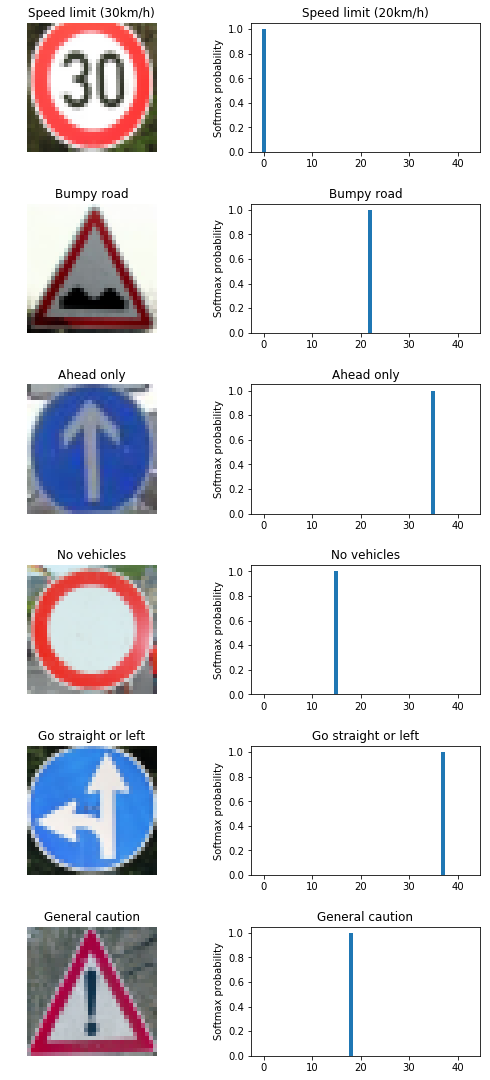

In [251]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

fig, axs = plt.subplots(6,2, figsize=(9, 19))
fig.subplots_adjust(hspace = .4, wspace=.2)
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(my_images[i//2])
        axs[i].set_title(traffic_sign_names[my_labels[i//2]])
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')
        axs[i].set_title(traffic_sign_names[my_top_k_classes[i//2][0]])



#### 1. Six German traffic signs

There are six German traffic signs that I found on the web:

The first image might be difficult to classify because since it is very blured out


#### 2. The model's predictions 

Here are the results of the prediction:

| Image			        |     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 30 km/h      		    | 20 km/h   									|
| Bumpy Road    		| Bumpy Road									|
| Ahead only			| Ahead only									|
| No vehciles	      	| No vehciles					 				|
| Go straight on left	| Go Straight or left      						|
| General cuation       | General caution                               |



The model was able to correctly guess 5 of the 6 traffic signs, which gives an accuracy of 83%. This compares favorably to the accuracy on the test set.

#### 3. predicting on each of the five new images and the softmax probabilities for each prediction. 

* For the first image, the model is relatively sure that this is a 20 km/h (probability of 1.0), and the image contain a 30km/h. The top three soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 1.0         			| 20 km/h   									|
| 0     				| 30 km/h 										|
| 0 					| 50 km/h										|

* For the second image, the model is relatively sure that this is a bumpy road (probability of 1.0). The top three soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 1.0         			| Bumpy road   									|
| 0     				| Bicycle crossing 								|
| 0 					| Trffic signals								|

* For the third image, the model is relatively sure that this is a Ahead only (probability of 1.0). The top three soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 1.0         			| Ahead only   									|
| 0     				| Go straigh or left 							|
| 0 					| Turn right ahead								|

* For the fourth image, the model is relatively sure that this is a No vehicles (probability of 0.99). The top three soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| .99        			| No vehicles   								|
| 0     				| Priority road 								|
| 0 					| No passing									|

* For the fifth image, the model is relatively sure that this is a Go straight or left (probability of 1.0). The top three soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 1.0         			| Go straight or left   						|
| 0     				| Slippery road 								|
| 0 					| Turn right ahead								|

* For the second image, the model is relatively sure that this is a General caution (probability of 1.0). The top three soft max probabilities were

| Probability         	|     Prediction	        					|
|:---------------------:|:---------------------------------------------:|
| 1.0         			| General caution   							|
| 0     				| Traffic signals 								|
| 0 					| Pedestrains									|

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")